How does the LIME model work?

generate locally faithful explanations for complex machine learning models by perturbing input instances, observing the corresponding model outputs, and training an interpretable model on these perturbed samples to approximate the black-box model locally. The interpretable model provides insights into the black-box model's decision-making for specific instances.

In which cases you can’t use SHAP
Explainer?

The computation of Shapley values involves considering all possible combinations of feature contributions, which can become impractical for models with a high number of features or large datasets.

You need a fast model. Do you choose
LIME or SHAP Explainer?

LIME often provides quicker approximations of local model behavior by generating interpretable models on perturbed samples.

Which model do you use if you want to
take into account the features
interactions?

LIME focuses on local interpretability and may not capture interactions as effectively as SHAP does on a global scale.

Can explain global models using LIME?

LIME (Local Interpretable Model-agnostic Explanations) is primarily designed for local interpretability, meaning it is more focused on explaining the predictions of complex models at the instance level. While LIME provides insights into how a specific instance is being interpreted by a model, it may not directly extend to explaining global model 

SHAP (SHapley Additive exPlanations) are often more suitable

Read the chocolate data from
flavors_of_cacao_2.csv

In [3]:
import pandas as pd

chocolate_data = pd.read_csv('flavors_of_cacao.csv')

display(chocolate_data)

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru
...,...,...,...,...,...,...,...,...,...
1790,Zotter,Peru,647,2011,70%,Austria,3.75,,Peru
1791,Zotter,Congo,749,2011,65%,Austria,3.00,Forastero,Congo
1792,Zotter,Kerala State,749,2011,65%,Austria,3.50,Forastero,India
1793,Zotter,Kerala State,781,2011,62%,Austria,3.25,,India


In [ ]:
chocolate_data.

How can you use categorical data for
classification?

techniques like one-hot encoding or label encoding to convert categorical variables into a numerical format that machine learning models can handle.

-> encode categorical data using
OneHotEncoder

In [7]:
from sklearn.preprocessing import OneHotEncoder

categorical_columns = chocolate_data.dtypes[chocolate_data.dtypes == 'object'].index.to_list()

categorical_data = chocolate_data[categorical_columns]

encoder = OneHotEncoder(sparse=False, drop='first')

encoded_data = encoder.fit_transform(categorical_data)

encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_columns))

chocolate_data_encoded = pd.concat([chocolate_data, encoded_df], axis=1)

display(chocolate_data_encoded)

C:\Users\msabh\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin,Company \n(Maker-if known)_AMMA,...,"Broad Bean\nOrigin_Venezuela, Carribean","Broad Bean\nOrigin_Venezuela, Dom. Rep.","Broad Bean\nOrigin_Venezuela, Ghana","Broad Bean\nOrigin_Venezuela, Java","Broad Bean\nOrigin_Venezuela, Trinidad",Broad Bean\nOrigin_Venezuela/ Ghana,Broad Bean\nOrigin_Vietnam,Broad Bean\nOrigin_West Africa,Broad Bean\nOrigin_,Broad Bean\nOrigin_nan
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1790,Zotter,Peru,647,2011,70%,Austria,3.75,,Peru,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1791,Zotter,Congo,749,2011,65%,Austria,3.00,Forastero,Congo,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1792,Zotter,Kerala State,749,2011,65%,Austria,3.50,Forastero,India,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1793,Zotter,Kerala State,781,2011,62%,Austria,3.25,,India,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
chocolate_data_encoded.columns = chocolate_data_encoded.columns.str.replace('\\xa0', '').str.replace('\\n', '')
encoded_chocolate_data = chocolate_data_encoded.select_dtypes(exclude=['object'])
display(encoded_chocolate_data)

,REF,Review\nDate,Rating,Company \n(Maker-if known)_AMMA,Company \n(Maker-if known)_Acalli,Company \n(Maker-if known)_Adi,Company \n(Maker-if known)_Aequare (Gianduja),Company \n(Maker-if known)_Ah Cacao,Company \n(Maker-if known)_Akesson's (Pralus),Company \n(Maker-if known)_Alain Ducasse,...,"Broad Bean\nOrigin_Venezuela, Carribean","Broad Bean\nOrigin_Venezuela, Dom. Rep.","Broad Bean\nOrigin_Venezuela, Ghana","Broad Bean\nOrigin_Venezuela, Java","Broad Bean\nOrigin_Venezuela, Trinidad",Broad Bean\nOrigin_Venezuela/ Ghana,Broad Bean\nOrigin_Vietnam,Broad Bean\nOrigin_West Africa,Broad Bean\nOrigin_,Broad Bean\nOrigin_nan
0,1876,2016,3.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1676,2015,2.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1676,2015,3.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1680,2015,3.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1704,2015,3.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1790,647,2011,3.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1791,749,2011,3.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1792,749,2011,3.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1793,781,2011,3.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Define output: y>=3.5 -> y=1 else y=0


In [15]:
encoded_chocolate_data['y'] = encoded_chocolate_data['Rating'] >= 3.5
encoded_chocolate_data['y'] = encoded_chocolate_data['y'].astype(int)
display(encoded_chocolate_data[['Rating', 'y']])

,Rating,y
0,3.75,1
1,2.75,0
2,3.00,0
3,3.50,1
4,3.50,1
...,...,...
1790,3.75,1
1791,3.00,0
1792,3.50,1
1793,3.25,0


Create the following model
svm_mdl = svm.SVC(probability=True, gamma='auto',
random_state=rand)

In [16]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

svm_mdl = svm.SVC(probability=True, gamma='auto', random_state=49)


Train the model

In [34]:
X = encoded_chocolate_data.drop(['Rating', 'y'], axis=1)  # Assuming 'Rating' is the target variable
y = encoded_chocolate_data['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=49)

print(type(X_train))

scaler = StandardScaler()
X_train_scaled = X_train
X_test_scaled = X_test

print(type(X_test_scaled))

svm_mdl.fit(X_train_scaled, y_train)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


SVC(gamma='auto', probability=True, random_state=49)

Make predictions for the test data

In [19]:
y_pred = svm_mdl.predict(X_test_scaled)

print("Predicted values:")
print(y_pred)

Predicted values:
[1 1 0 0 1 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0]


Print the mean_squared_error of train and test
data

In [20]:
from sklearn.metrics import mean_squared_error

y_train_pred = svm_mdl.predict(X_train_scaled)

print('Mean Squared Error (Train): ',mean_squared_error(y_train, y_train_pred))

print('Mean Squared Error (Test): ',mean_squared_error(y_test, y_pred))

Mean Squared Error (Train):  0.08565459610027855
Mean Squared Error (Test):  0.38997214484679665


In [68]:
from sklearn.metrics import accuracy_score

print('Mean Squared Error (Train): ',accuracy_score(y_train, y_train_pred))

print('Mean Squared Error (Test): ',accuracy_score(y_test, y_pred))

Mean Squared Error (Train):  0.9143454038997214
Mean Squared Error (Test):  0.6100278551532033


Summarize the training data using k-means


· Initialize your explainer

In [21]:
import shap

x_train_summary = shap.kmeans(X_train_scaled,10)
shap_svm_explainer = shap.KernelExplainer(svm_mdl.predict_proba,x_train_summary)

Compute the SHAP values for a test data set

Plot the SHAP values for class == 1

In [23]:
shapsvm_values_test = shap_svm_explainer.shap_values(X_test_scaled, nsamples=1000,  l1_reg="num_features(20)")

  0%|          | 0/359 [00:00<?, ?it/s]

NameError: name 'shap_svm_values_test' is not defined

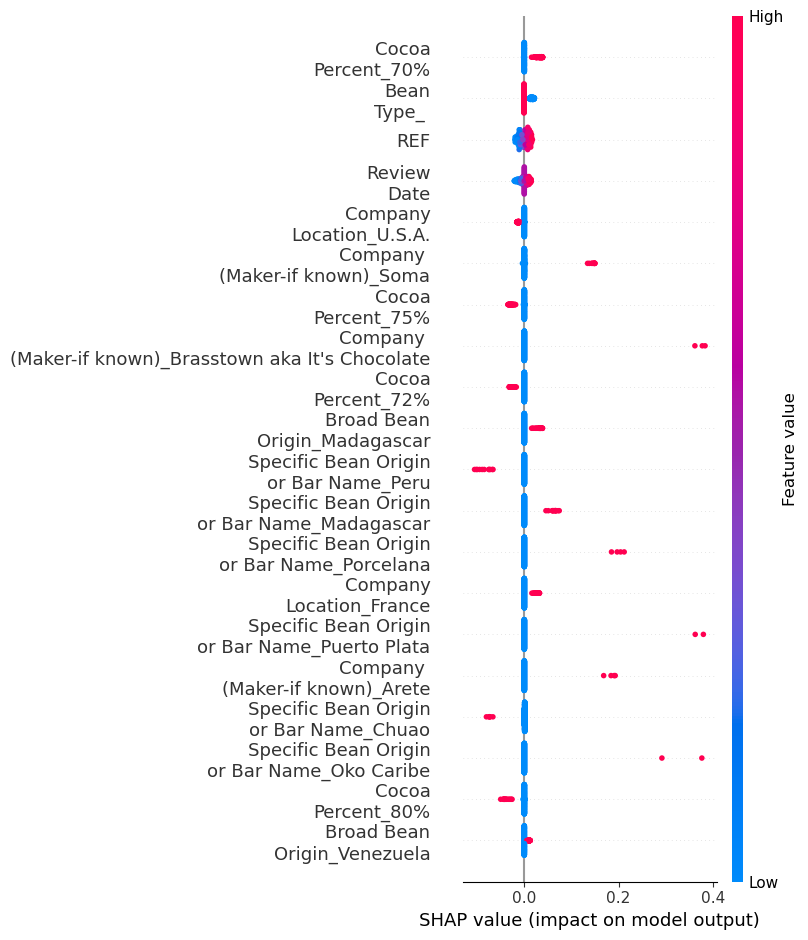

In [35]:
shap.summary_plot(shapsvm_values_test[1], X_test_scaled, plot_type="dot")

Use data of index 6 for local interpretation


In [64]:
import shap
import numpy as np

expected_values = shap_svm_explainer.expected_value
shap.initjs()

data_point_index = 6
data_point = X_test_scaled.iloc[[data_point_index]]

# Convert data_point from DataFrame to NumPy array
data_point_np = data_point.values

shap.force_plot(
    expected_values[1],                
    shapsvm_values_test_np[1, 0, :],   
    data_point_np,                      
    feature_names=X_test_scaled.columns
)
# print(data_point_np)

Print data from data set 6

In [50]:
display(chocolate_data.iloc[6])

Company \n(Maker-if known)           A. Morin
Specific Bean Origin\nor Bar Name        Cuba
REF                                      1315
Review\nDate                             2014
Cocoa\nPercent                            70%
Company\nLocation                      France
Rating                                    3.5
Bean\nType                                   
Broad Bean\nOrigin                       Cuba
Name: 6, dtype: object

Plot local explanation for data set 6
· Decision plot
· Force plot and
· Waterfall plot

X does not have valid feature names, but SVC was fitted with feature names


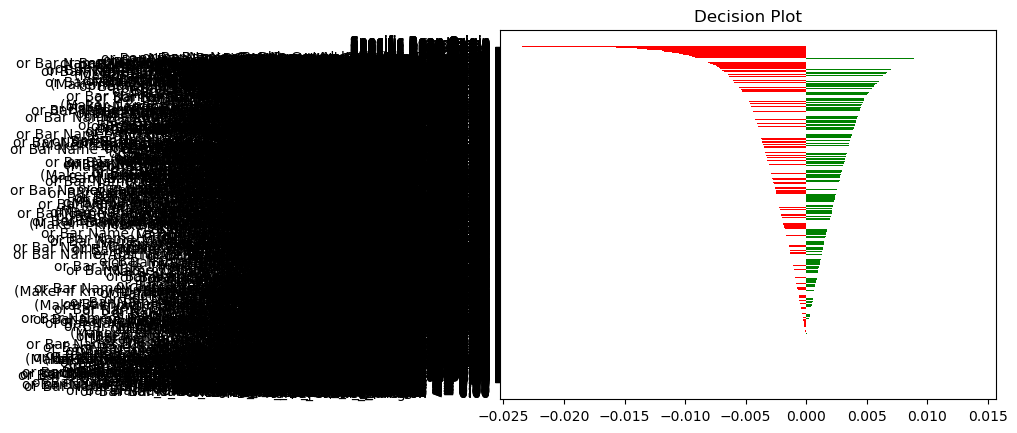

In [61]:
import lime
import lime.lime_tabular
import shap
import matplotlib.pyplot as plt
# from matplotlib.ticker import AutoLocator

# LIME explanation
explainer = lime.lime_tabular.LimeTabularExplainer(X_train_scaled.values, feature_names=X_train_scaled.columns, mode="classification")

data_point_index = 6
data_point = X_test_scaled.iloc[[data_point_index]].values[0]

explanation = explainer.explain_instance(data_point, svm_mdl.predict_proba, num_features=len(X_train_scaled.columns))

# Decision plot
decision_plot = explanation.as_pyplot_figure(label=1)
plt.title('Decision Plot')
plt.show()

# ax = decision_plot.gca()
# ax.yaxis.set_major_locator(AutoLocator())
# ticks = ax.get_yticks()
# ax.set_yticklabels([f"{tick:.2f}" for tick in ticks])

# Force plot using SHAP
shap.initjs()
shap_values = shap_svm_explainer.shap_values(data_point)
force_plot = shap.force_plot(
    shap_svm_explainer.expected_value[1],  # expected value for class 1
    shap_values[1],                        # SHAP values for class 1
    data_point_np,                        # features for the selected data point (as NumPy array)
    feature_names=X_train_scaled.columns  # use the correct feature names
)
plt.title('Force Plot')
plt.show()

# # Waterfall plot using SHAP
# waterfall_plot = shap.decision_plot(
#     base_value=shap_svm_explainer.expected_value[1],
#     shap_values=shap_values[1],
#     features=data_point_np,
#     feature_names=feature_names_list
# )
# plt.title('Waterfall Plot')
# plt.show()
